In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\PID\PID_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148,72.0,35.0,0.0,33.6,0.627,50.0
1,1.0,85,66.0,29.0,0.0,26.6,0.351,31.0
2,8.0,183,64.0,0.0,0.0,23.3,0.672,32.0
3,1.0,89,66.0,23.0,94.0,28.1,NaN,21.0
4,0.0,137,40.0,35.0,168.0,43.1,2.288,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101,76.0,48.0,180.0,32.9,0.171,63.0
764,2.0,122,70.0,27.0,0.0,36.8,0.340,27.0
765,5.0,121,72.0,23.0,112.0,26.2,0.245,30.0
766,1.0,126,NaN,0.0,0.0,30.1,0.349,47.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	12
int64		column 2	0
float64		column 3	6
float64		column 4	3
float64		column 5	6
float64		column 6	3
float64		column 7	12
float64		column 8	6


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
count,756.00000,768.000000,762.000000,765.000000,762.000000,765.000000,756.000000,762.000000
mean,3.82672,120.894531,69.080052,20.538562,79.314961,31.990458,0.472390,33.251969
std,3.35105,31.972618,19.362240,15.947070,115.299168,7.895149,0.332236,11.743851
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.00000,99.000000,64.000000,0.000000,0.000000,27.300000,0.244750,24.000000
50%,3.00000,117.000000,72.000000,23.000000,24.000000,32.000000,0.372500,29.000000
75%,6.00000,140.250000,80.000000,32.000000,126.000000,36.600000,0.624500,41.000000
max,17.00000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<AxesSubplot:>

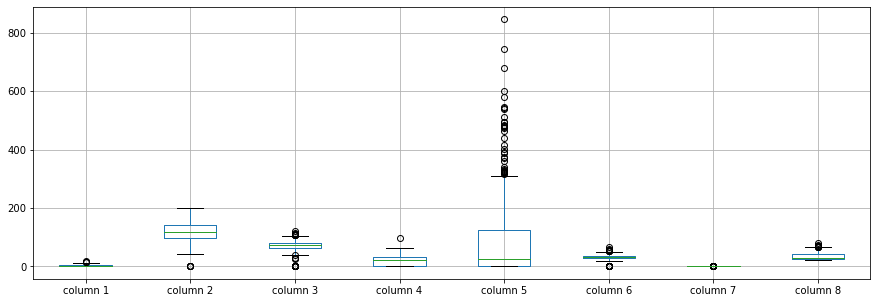

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      3.826720
column 2    120.894531
column 3     69.080052
column 4     20.538562
column 5     79.314961
column 6     31.990458
column 7      0.472390
column 8     33.251969
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
column 1,1.000000,0.132837,0.138992,-0.079680,-0.070576,0.030544,-0.044208,0.541176
column 2,0.132837,1.000000,0.153832,0.061990,0.328105,0.220325,0.133295,0.260772
column 3,0.138992,0.153832,1.000000,0.204883,0.089363,0.277967,0.045608,0.243605
column 4,-0.079680,0.061990,0.204883,1.000000,0.433862,0.390561,0.185145,-0.113642
column 5,-0.070576,0.328105,0.089363,0.433862,1.000000,0.196385,0.177825,-0.051000
column 6,0.030544,0.220325,0.277967,0.390561,0.196385,1.000000,0.140625,0.037689
column 7,-0.044208,0.133295,0.045608,0.185145,0.177825,0.140625,1.000000,0.036353
column 8,0.541176,0.260772,0.243605,-0.113642,-0.051000,0.037689,0.036353,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [8,8+11,8+11+11,8+11+11+11,8+11+11+11+11,8+11+11+11+11+11,8+11+11+11+11,8+11+11+11,8+11+11,8+11,8], vae_layer = False, seed = 11)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [8]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 427.1282552083333
Epoch: 1 , loss: 423.5179951985677
Epoch: 2 , loss: 425.675994237264
Epoch: 3 , loss: 423.95325724283856
Epoch: 4 , loss: 424.37138239542645
Epoch: 5 , loss: 425.39559618632
Epoch: 6 , loss: 424.90124066670734
Epoch: 7 , loss: 425.24056816101074
Epoch: 8 , loss: 424.37289810180664
Epoch: 9 , loss: 424.3091246287028
Epoch: 10 , loss: 421.06647364298504
Epoch: 11 , loss: 420.7020066579183
Epoch: 12 , loss: 414.46089363098145
Epoch: 13 , loss: 404.9594332377116
Epoch: 14 , loss: 394.10519154866535
Epoch: 15 , loss: 383.6118354797363
Epoch: 16 , loss: 380.76636759440106
Epoch: 17 , loss: 372.3691240946452
Epoch: 18 , loss: 366.5670591990153
Epoch: 19 , loss: 359.8229611714681
Epoch: 20 , loss: 351.51451873779297
Epoch: 21 , loss: 362.43874231974286
Epoch: 22 , loss: 351.2236893971761
Epoch: 23 , loss: 350.63965606689453
Epoch: 24 , loss: 348.89994112650555
Epoch: 25 , loss: 349.82599004109

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(768, 8)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1     8.000
column 2    99.000
column 3    84.000
column 4     0.000
column 5     0.000
column 6    35.400
column 7     0.388
column 8    50.000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\PID.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,0.0,0,0.000000,0.0,0.0,0.0,0.000000,0.0
1,0.0,0,0.000000,0.0,0.0,0.0,0.000000,0.0
2,0.0,0,0.000000,0.0,0.0,0.0,0.000000,0.0
3,0.0,0,0.000000,0.0,0.0,0.0,0.048264,0.0
4,0.0,0,0.000000,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...
763,0.0,0,0.000000,0.0,0.0,0.0,0.000000,0.0
764,0.0,0,0.000000,0.0,0.0,0.0,0.000000,0.0
765,0.0,0,0.000000,0.0,0.0,0.0,0.000000,0.0
766,0.0,0,-59.718794,0.0,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(461.0229009601832, 5776.576248839705)

In [17]:
NRMS=numerator/denominator
NRMS


0.07980902200551498

In [18]:
new_df.iloc[66,:]

column 1      0.000
column 2    109.000
column 3     88.000
column 4     30.000
column 5      0.000
column 6     32.500
column 7      0.855
column 8     38.000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8
0,6.0,148,72.000000,35.0,0.0,33.6,0.627000,50.0
1,1.0,85,66.000000,29.0,0.0,26.6,0.351000,31.0
2,8.0,183,64.000000,0.0,0.0,23.3,0.672000,32.0
3,1.0,89,66.000000,23.0,94.0,28.1,0.215264,21.0
4,0.0,137,40.000000,35.0,168.0,43.1,2.288000,33.0
...,...,...,...,...,...,...,...,...
763,10.0,101,76.000000,48.0,180.0,32.9,0.171000,63.0
764,2.0,122,70.000000,27.0,0.0,36.8,0.340000,27.0
765,5.0,121,72.000000,23.0,112.0,26.2,0.245000,30.0
766,1.0,126,0.281206,0.0,0.0,30.1,0.349000,47.0


In [21]:
imputations[-1].to_excel("PID_NE_1.xlsx", index=False, header=False)